In [1]:
import sqlite3
import pandas as pd

In [3]:
db_path='C:\\Users\\shalo\\Documents\\examenML\\olist.db'

In [5]:
# Fonction pour se connecter à la base de données et récupérer les données avec read_sql
def connect_to_db(db_path, request):
    try:
        # Connexion à la base de données
        connection = sqlite3.connect(db_path)
        print("Connexion réussie")

        # Utilisation de read_sql pour exécuter la requête et charger les données dans un DataFrame
        df = pd.read_sql(request, connection)

        # Fermeture de la connexion
        connection.close()
        print("Connexion fermée.")

        return df

    except sqlite3.Error as e:
        print(f"Erreur lors de l'accès à la base de données : {e}")
        return None


db_path = 'olist.db'  # le chemin vers votre base de données
request = 'SELECT * FROM orders;'  # le nom de votre table


connect_to_db(db_path, request)

Connexion réussie
Connexion fermée.


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [7]:
request1 = """
SELECT order_id, 
       customer_id, 
       order_status, 
       order_purchase_timestamp, 
       order_delivered_customer_date,
       order_estimated_delivery_date
FROM orders 
WHERE order_status != 'canceled'
  AND order_purchase_timestamp >= (
      SELECT DATE(MAX(order_purchase_timestamp), '-3 MONTHS')
      FROM orders
  )
  AND order_delivered_customer_date > DATE(order_estimated_delivery_date, '+3 DAYS')
ORDER BY order_purchase_timestamp DESC;
"""

connect_to_db(db_path, request1)


Connexion réussie
Connexion fermée.


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e175b8edb692594c903e6a020fe94d8f,96456ec75560f2ec10bad6ea8f497247,delivered,2018-08-24 18:26:00,2018-09-03 18:18:49,2018-08-29 00:00:00
1,478116017852df9d1ac392abcf28927f,ecd37231a9052d49db278a6b92d28054,delivered,2018-08-24 13:59:41,2018-09-03 17:18:42,2018-08-29 00:00:00
2,a5e7b733ac9f9e3d9bafeacd10b5aff9,4ae745c1702dfdb655e2c1147289887a,delivered,2018-08-21 21:44:04,2018-08-27 16:54:45,2018-08-24 00:00:00
3,140d9953eb16589e277967bbfcdf7ac5,2a1dbcc0c26487ca29fe53b16de930a5,delivered,2018-08-21 12:35:25,2018-08-27 18:02:19,2018-08-24 00:00:00
4,1c709af6dc28e45be0dda17b368271df,1dd47f0ace79cd4c8b2e0e3e428dc290,delivered,2018-08-21 10:20:46,2018-08-31 20:55:38,2018-08-24 00:00:00
...,...,...,...,...,...,...
317,4e4aa299535ead6fe63a779d539c493d,860403dc3e131f362cda3ddb09c5a0ce,delivered,2018-07-17 18:38:40,2018-08-10 17:51:46,2018-08-07 00:00:00
318,56f1d06ce4c0cf8a60c9d1af768f39de,8835260f376f7746c4e6cb38547bdfb9,delivered,2018-07-17 15:21:10,2018-08-20 12:08:32,2018-08-14 00:00:00
319,48db59db0fa80043cb67ca9990c96b4b,404077a979fd9f71e8faf8931fae497c,delivered,2018-07-17 15:01:30,2018-08-10 16:02:33,2018-08-07 00:00:00
320,3c6c4d8395cd1b0c68ffa02fa1446367,f43e2faac72ec3438198e51325ab362c,delivered,2018-07-17 09:01:49,2018-08-15 17:58:41,2018-08-10 00:00:00


In [9]:
request2 = """
SELECT 
    s.seller_id, 
    SUM(oi.price + oi.freight_value) AS total_revenue
FROM 
    order_items oi
JOIN 
    sellers s ON oi.seller_id = s.seller_id
JOIN 
    orders o ON oi.order_id = o.order_id
WHERE 
    o.order_status = 'delivered'

GROUP BY 
    s.seller_id
HAVING 
    total_revenue > 100000 
order by total_revenue desc;
"""

connect_to_db(db_path, request2)


Connexion réussie
Connexion fermée.


,seller_id,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,247007.06
1,7c67e1448b00f6e969d365cea6b010ab,237806.69
2,4a3ca9315b744ce9f8e9374361493884,231220.43
3,53243585a1d6dc2643021fd1853d8905,230797.02
4,fa1c13f2614d7b5c4749cbc52fecda94,200833.50
5,da8622b14eb17ae2831f4ac5b9dab84a,184706.78
6,7e93a43ef30c4f03f38b393420bc753a,171973.55
7,1025f0e2d44d7041d6cf58b6550e0bfa,171924.96
8,7a67c85e85bb2ce8582c35f2203ad736,160278.52
9,955fee9216a65b617aa5c0531780ce60,156606.48


In [10]:
request3 = """
SELECT 
    c.customer_zip_code_prefix, 
    AVG(orv.review_score) AS avg_review_score, 
    COUNT(orv.review_id) AS review_count
FROM 
    order_reviews orv
JOIN 
    orders o ON o.order_id = orv.order_id
JOIN 
    customers c ON c.customer_id = o.customer_id
WHERE 
    DATE(orv.review_creation_date) > (
        SELECT DATE(MAX(review_creation_date), '-12 months') 
        FROM order_reviews
    )
GROUP BY 
    c.customer_zip_code_prefix
HAVING 
    review_count > 30
    AND avg_review_score <= 3.5
ORDER BY 
    avg_review_score ASC;
"""
connect_to_db(db_path, request3)

Connexion réussie
Connexion fermée.


,customer_zip_code_prefix,avg_review_score,review_count
0,22753,2.867925,53
1,22723,3.000000,31
2,28893,3.064516,31
3,22770,3.184211,38
4,13056,3.272727,33
5,22793,3.302083,96
6,88058,3.343750,32
7,13295,3.352941,34
8,21321,3.363636,44
9,24120,3.437500,32


In [12]:
requestRFM = """SELECT 
    o.customer_id,
    CAST((JULIANDAY((SELECT MAX(order_purchase_timestamp) FROM orders)) 
          - JULIANDAY(MAX(o.order_purchase_timestamp))) AS INTEGER) AS recency, -- Jours depuis la dernière commande
    COUNT(o.order_id) AS frequency, -- Nombre total de commandes
    SUM(oi.price) AS monetary -- Somme totale des montants dépensés
FROM 
    orders o
JOIN 
    order_items oi ON o.order_id = oi.order_id
WHERE 
    o.order_status = 'delivered'
GROUP BY 
    o.customer_id;

"""

connect_to_db(db_path, requestRFM)

Connexion réussie
Connexion fermée.


,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80
1,000161a058600d5901f007fab4c27140,458,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90
4,000379cdec625522490c315e70c7a9fb,198,1,93.00
...,...,...,...,...
96473,fffcb937e9dd47a13f05ecb8290f4d3e,214,1,78.00
96474,fffecc9f79fd8c764f843e9951b11341,202,1,54.90
96475,fffeda5b6d849fbd39689bb92087f431,148,1,47.90
96476,ffff42319e9b2d713724ae527742af25,126,1,199.90


In [14]:
import pandas as pd
import sqlite3

# Connexion à la base de données SQLite
db_path = 'olist.db'
connection = sqlite3.connect(db_path)

# Récupérer les données RFM
request_rfm = """
SELECT 
    o.customer_id,
    CAST((JULIANDAY((SELECT MAX(order_purchase_timestamp) FROM orders)) 
          - JULIANDAY(MAX(o.order_purchase_timestamp))) AS INTEGER) AS recency,
    COUNT(o.order_id) AS frequency,
    SUM(oi.price) AS monetary
FROM 
    orders o
JOIN 
    order_items oi ON o.order_id = oi.order_id
WHERE 
    o.order_status = 'delivered'
GROUP BY 
    o.customer_id;
"""

# Importer les données RFM
rfm_data = pd.read_sql(request_rfm, connection)

# Importer les données de satisfaction (order_reviews)
request_reviews = """
SELECT o.customer_id, AVG(r.review_score) AS satisfaction
FROM orders o
JOIN order_reviews r ON o.order_id = r.order_id
GROUP BY o.customer_id;
"""

reviews_data = pd.read_sql(request_reviews, connection)

# Fusionner les données RFM avec les données de satisfaction
rfm_data = pd.merge(rfm_data, reviews_data, on='customer_id', how='left')

# Afficher un aperçu
print("Aperçu des données fusionnées :")
print(rfm_data.head())

# Fermer la connexion
connection.close()

Aperçu des données fusionnées :
                        customer_id  recency  frequency  monetary  \
0  00012a2ce6f8dcda20d059ce98491703      337          1     89.80   
1  000161a058600d5901f007fab4c27140      458          1     54.90   
2  0001fd6190edaaf884bcaf3d49edf079      596          1    179.99   
3  0002414f95344307404f0ace7a26f1d5      427          1    149.90   
4  000379cdec625522490c315e70c7a9fb      198          1     93.00   

   satisfaction  
0           1.0  
1           4.0  
2           5.0  
3           5.0  
4           4.0  


In [16]:
# Remplacer les NaN de satisfaction par la moyenne
rfm_data['satisfaction'].fillna(rfm_data['satisfaction'].mean(), inplace=True)

# Vérification après imputation
print("Résumé des valeurs manquantes après imputation :")
print(rfm_data.isnull().sum())

Résumé des valeurs manquantes après imputation :
customer_id     0
recency         0
frequency       0
monetary        0
satisfaction    0
dtype: int64


C:\Users\shalo\AppData\Local\Temp\ipykernel_16604\3870314273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_data['satisfaction'].fillna(rfm_data['satisfaction'].mean(), inplace=True)


In [19]:
# Supprimer les lignes avec NaN dans satisfaction
rfm_data = rfm_data.dropna(subset=['satisfaction'])

# Vérification
print("Résumé après suppression des NaN :")
print(rfm_data.isnull().sum())

Résumé après suppression des NaN :
customer_id     0
recency         0
frequency       0
monetary        0
satisfaction    0
dtype: int64


In [21]:
from sklearn.preprocessing import StandardScaler

# Standardisation des données RFM et satisfaction
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['recency', 'frequency', 'monetary', 'satisfaction']])

In [23]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les variables pour KMeans
rfm_features = rfm_data[['recency', 'frequency', 'monetary', 'satisfaction']]

# Standardiser les données
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Vérification après standardisation
print("Aperçu des données standardisées :")
print(pd.DataFrame(rfm_scaled, columns=rfm_features.columns).head())

Aperçu des données standardisées :
    recency  frequency  monetary  satisfaction
0  0.318743  -0.263916 -0.225989     -2.467100
1  1.110440  -0.263916 -0.392939     -0.122086
2  2.013368  -0.263916  0.205451      0.659585
3  0.907609  -0.263916  0.061511      0.659585
4 -0.590728  -0.263916 -0.210681     -0.122086


In [45]:
from sklearn.cluster import KMeans

# Appliquer KMeans avec 5 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Afficher les résultats
print("Données segmentées avec KMeans :")
print(rfm_data.head())

Données segmentées avec KMeans :
                        customer_id  recency  frequency  monetary  \
0  00012a2ce6f8dcda20d059ce98491703      337          1     89.80   
1  000161a058600d5901f007fab4c27140      458          1     54.90   
2  0001fd6190edaaf884bcaf3d49edf079      596          1    179.99   
3  0002414f95344307404f0ace7a26f1d5      427          1    149.90   
4  000379cdec625522490c315e70c7a9fb      198          1     93.00   

   satisfaction  Cluster  
0           1.0        3  
1           4.0        1  
2           5.0        1  
3           5.0        1  
4           4.0        0  


In [47]:
# Résumé statistique par cluster
cluster_summary = rfm_data.groupby('Cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'satisfaction': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'count'})

print("Résumé des clusters :")
print(cluster_summary)

Résumé des clusters :
            recency  frequency    monetary  satisfaction  count
Cluster                                                        
0        172.794463   1.058604  115.524524      4.705344  43666
1        443.349122   1.065827  117.358400      4.638921  33421
2        285.368684   2.941539  659.894759      3.701857   3404
3        280.184525   1.147057  125.632540      1.743823  15987


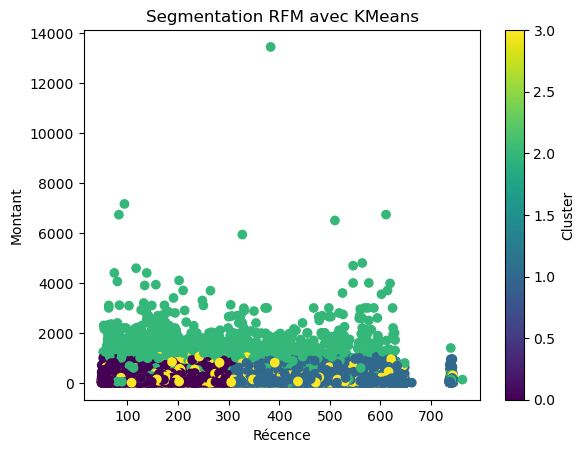

In [49]:
import matplotlib.pyplot as plt

# Visualisation des clusters (Recency vs Monetary)
plt.scatter(rfm_data['recency'], rfm_data['monetary'], c=rfm_data['Cluster'], cmap='viridis')
plt.xlabel('Récence')
plt.ylabel('Montant')
plt.title('Segmentation RFM avec KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [51]:
# Analyse statistique des clusters
cluster_summary = rfm_data.groupby('Cluster').agg({
    'recency': ['mean', 'median', 'min', 'max'],
    'frequency': ['mean', 'median', 'min', 'max'],
    'monetary': ['mean', 'median', 'min', 'max'],
    'satisfaction': ['mean', 'median', 'min', 'max'],
    'customer_id': 'count'
}).rename(columns={'customer_id': 'count'})

print("Résumé des statistiques par segment :")
print(cluster_summary)

Résumé des statistiques par segment :
            recency                  frequency                   monetary  \
               mean median  min  max      mean median min max        mean   
Cluster                                                                     
0        172.794463  171.0   49  309  1.058604    1.0   1   2  115.524524   
1        443.349122  434.0  305  744  1.065827    1.0   1   3  117.358400   
2        285.368684  269.0   49  762  2.941539    3.0   1  21  659.894759   
3        280.184525  260.0   49  743  1.147057    1.0   1   3  125.632540   

                                satisfaction                   count  
         median   min       max         mean median  min  max  count  
Cluster                                                               
0         80.00  0.85    999.99     4.705344    5.0  3.0  5.0  43666  
1         79.90  2.29   1049.00     4.638921    5.0  2.0  5.0  33421  
2        359.83  9.18  13440.00     3.701857    4.0  1.0  5.0   340

In [53]:
# Analyse statistique des clusters
cluster_summary = rfm_data.groupby('Cluster').agg({
    'recency': ['mean', 'median', 'min', 'max'],
    'frequency': ['mean', 'median', 'min', 'max'],
    'monetary': ['mean', 'median', 'min', 'max'],
    'satisfaction': ['mean', 'median', 'min', 'max'],
    'customer_id': 'count'
}).rename(columns={'customer_id': 'count'})

print("Résumé des statistiques par segment :")
print(cluster_summary)

Résumé des statistiques par segment :
            recency                  frequency                   monetary  \
               mean median  min  max      mean median min max        mean   
Cluster                                                                     
0        172.794463  171.0   49  309  1.058604    1.0   1   2  115.524524   
1        443.349122  434.0  305  744  1.065827    1.0   1   3  117.358400   
2        285.368684  269.0   49  762  2.941539    3.0   1  21  659.894759   
3        280.184525  260.0   49  743  1.147057    1.0   1   3  125.632540   

                                satisfaction                   count  
         median   min       max         mean median  min  max  count  
Cluster                                                               
0         80.00  0.85    999.99     4.705344    5.0  3.0  5.0  43666  
1         79.90  2.29   1049.00     4.638921    5.0  2.0  5.0  33421  
2        359.83  9.18  13440.00     3.701857    4.0  1.0  5.0   340

In [55]:
# Afficher l'inertie du modèle
print(f"Inertie du modèle K-Means : {kmeans.inertia_}")

Inertie du modèle K-Means : 194661.73411176767


Score de silhouette : 0.36


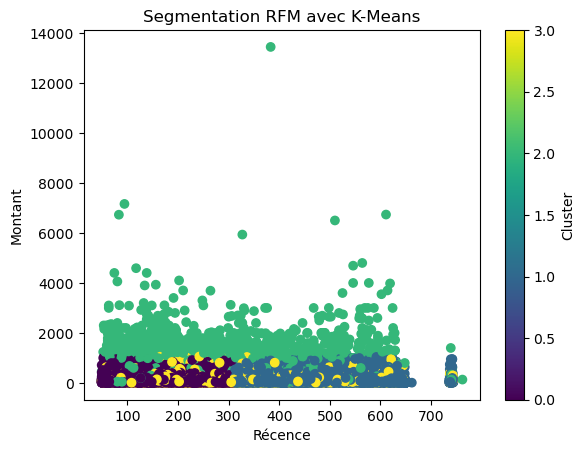

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sélectionner les colonnes pertinentes pour RFM
rfm_features = rfm_data[['recency', 'frequency', 'monetary', 'satisfaction']]

# Étape 1 : Standardisation des données
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Étape 2 : Appliquer K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Étape 3 : Calculer le score de silhouette
silhouette_avg = silhouette_score(rfm_scaled, rfm_data['Cluster'])
print(f"Score de silhouette : {silhouette_avg:.2f}")

# Étape 4 : Visualisation des clusters
plt.scatter(rfm_data['recency'], rfm_data['monetary'], c=rfm_data['Cluster'], cmap='viridis')
plt.xlabel('Récence')
plt.ylabel('Montant')
plt.title('Segmentation RFM avec K-Means')
plt.colorbar(label='Cluster')
plt.show()

In [58]:
#Fonction pour sauvegarder le modele pour l’utiliser dans streamlit

import joblib

# Sauvegarder le modèle K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')

# Sauvegarder le scaler
joblib.dump(scaler, 'scaler.pkl')

print("Modèle et scaler exportés avec succès !")

Modèle et scaler exportés avec succès !
